In [1]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
import torch.nn as nn
import dataset
from utils import label_to_onehot_tensor
import utils
label_to_onehot_tensor(["Class3"]*5)

tensor([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]], device='cuda:0')

In [3]:
b_f = torch.matmul(label_to_onehot_tensor(["Class3"]*5), torch.tensor([1, 2, 3]).float().to(device))

RuntimeError: size mismatch, got input (5), mat (5x4), vec (3)

In [ ]:
# 1 by 2 by 2 tensor of 1010

og_x = torch.tensor([[[[1,1],[1,1]]], [[[1,1],[1,1]]]]).to(device)
z = torch.tensor([[[1,0], [1,0]]]).to(device)
z.shape



torch.Size([1, 2, 2])

In [ ]:
one_t = torch.ones(og_x.size(0), 1, og_x.size(2), og_x.size(3)).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
zero_t = torch.zeros(og_x.size(0), 1, og_x.size(2), og_x.size(3)).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# add to original based on one hot
a = torch.where(z[:, 0].unsqueeze(1) == 1, one_t, zero_t)
a

tensor([[[[1., 0.],
          [1., 0.]]],


        [[[1., 0.],
          [1., 0.]]]], device='cuda:0')

number of wrong items:  72
expected wrong:  [7, 24, 10, 31]
choosen wrong:  [30, 5, 27, 10]


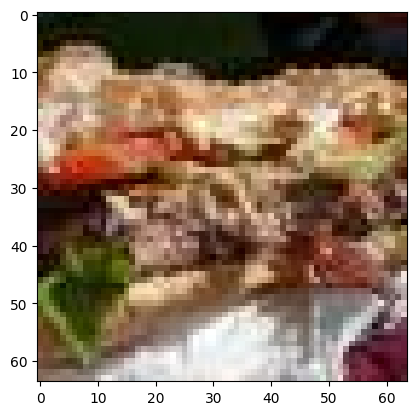

actual label:  0
predicted label:  3


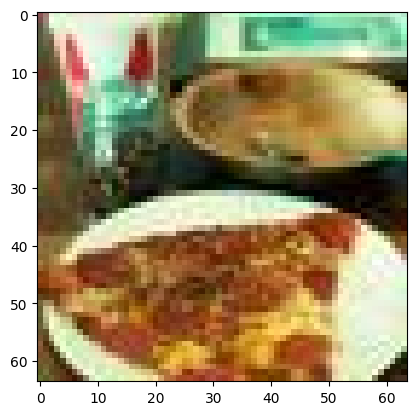

actual label:  3
predicted label:  0


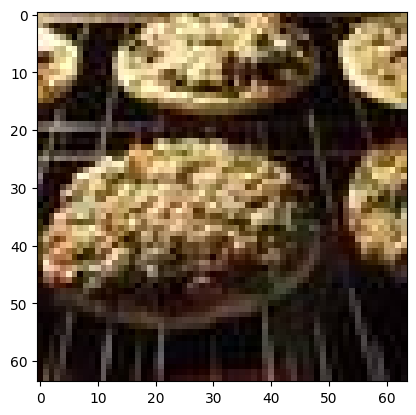

actual label:  3
predicted label:  2


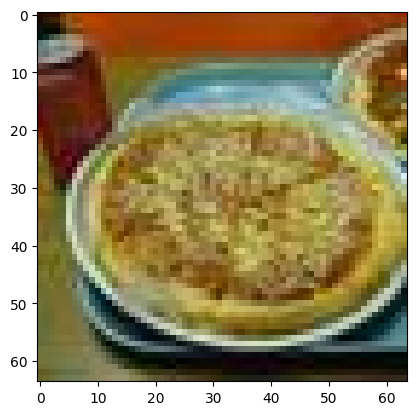

actual label:  3
predicted label:  0


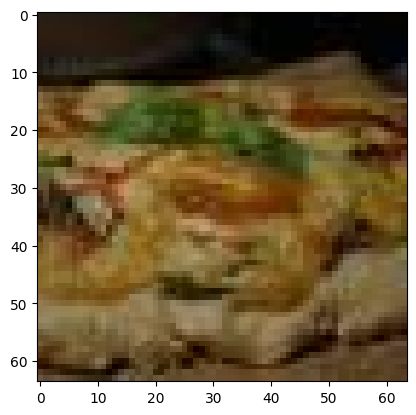

actual label:  3
predicted label:  0


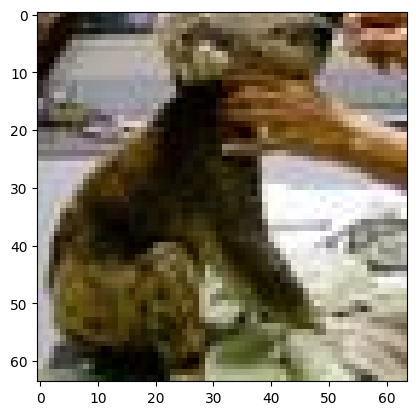

actual label:  2
predicted label:  0


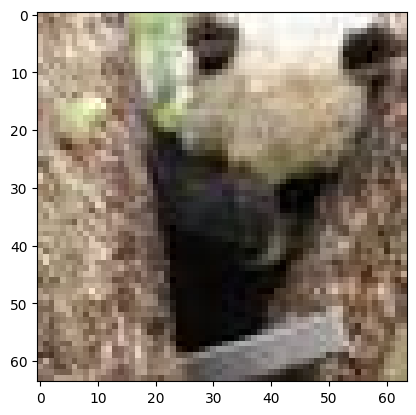

actual label:  1
predicted label:  2


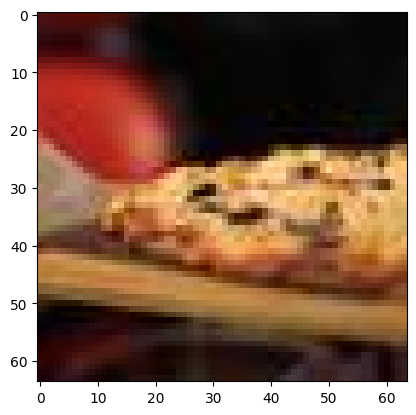

actual label:  3
predicted label:  0


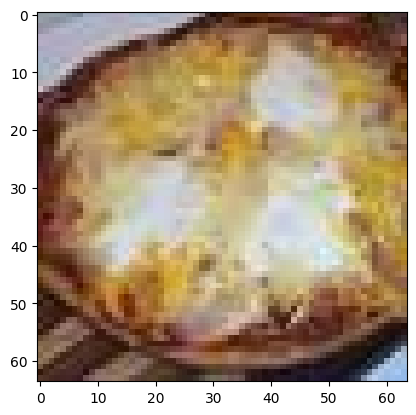

actual label:  3
predicted label:  0


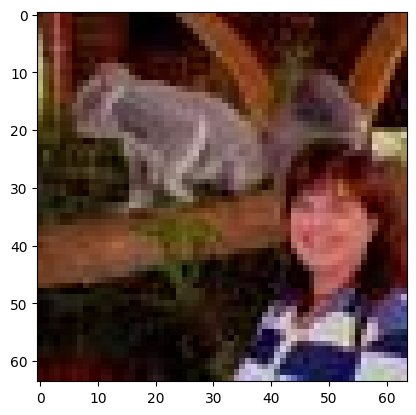

actual label:  2
predicted label:  0


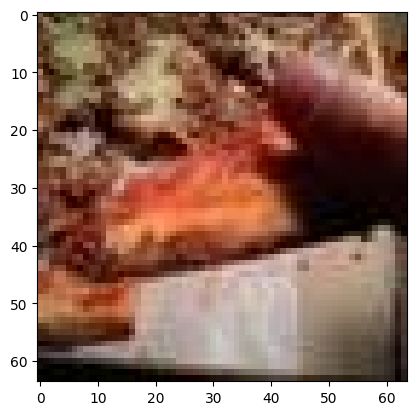

actual label:  3
predicted label:  2


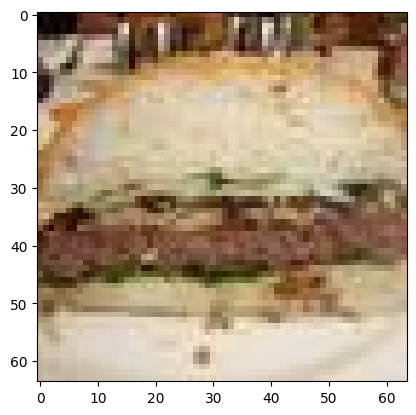

actual label:  0
predicted label:  3


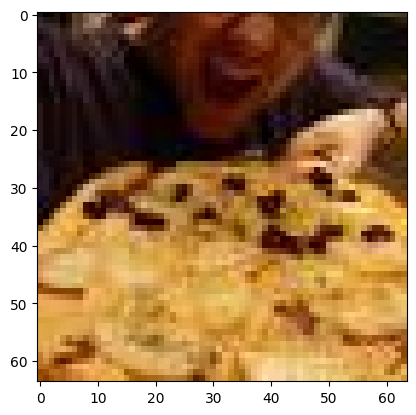

actual label:  3
predicted label:  0


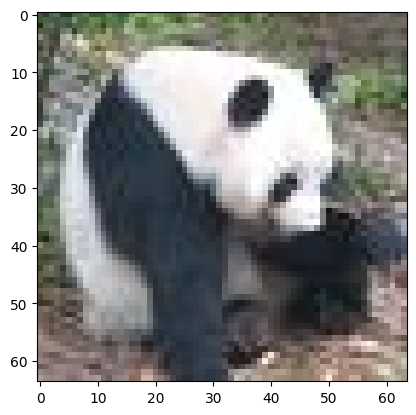

actual label:  1
predicted label:  2


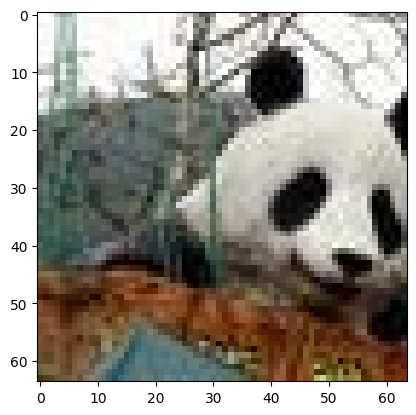

actual label:  1
predicted label:  2


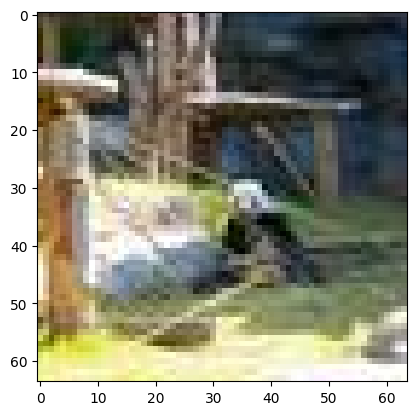

actual label:  1
predicted label:  0


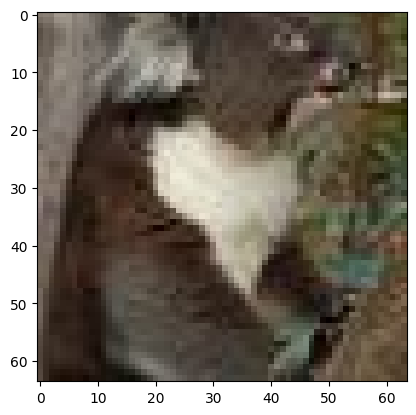

actual label:  2
predicted label:  1


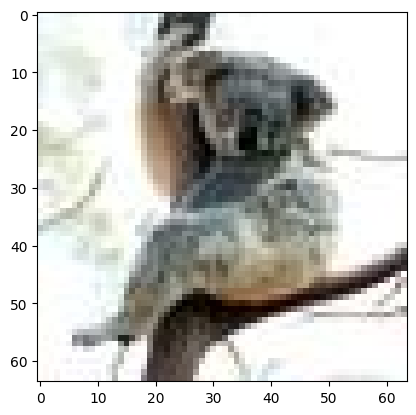

actual label:  2
predicted label:  1


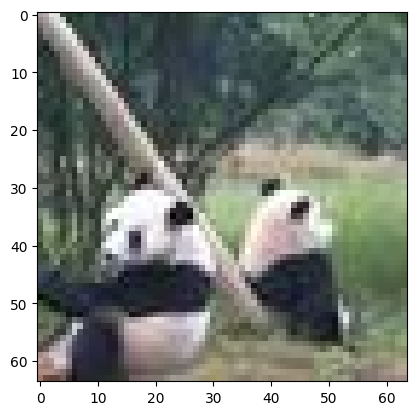

actual label:  1
predicted label:  2


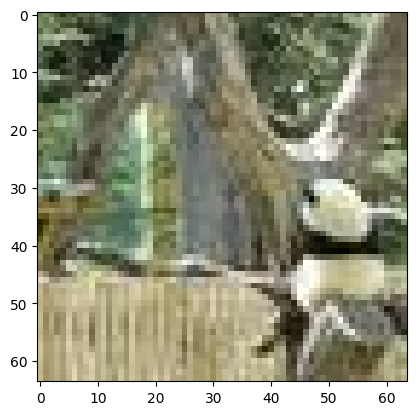

actual label:  1
predicted label:  2


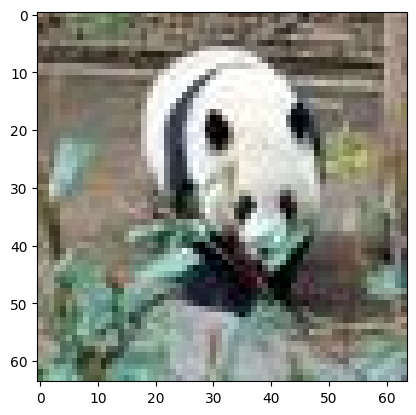

actual label:  1
predicted label:  2


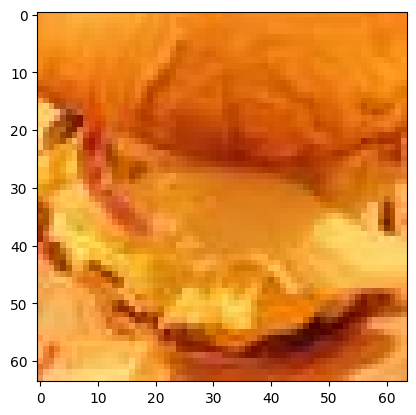

actual label:  0
predicted label:  3


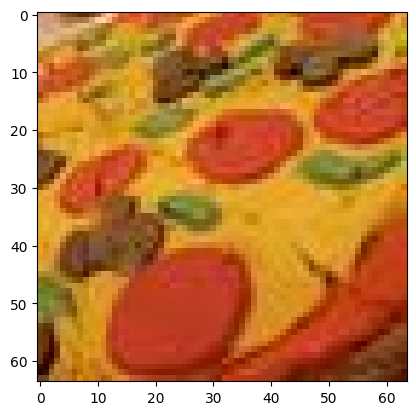

actual label:  3
predicted label:  0


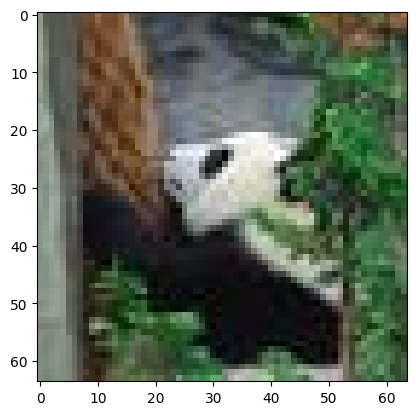

actual label:  1
predicted label:  2


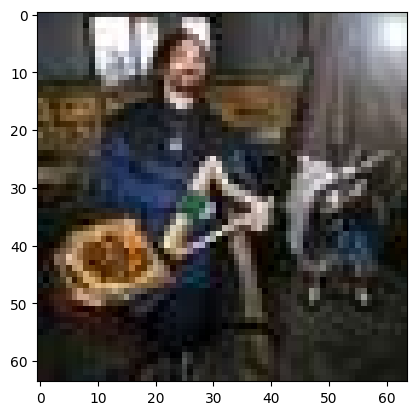

actual label:  3
predicted label:  2


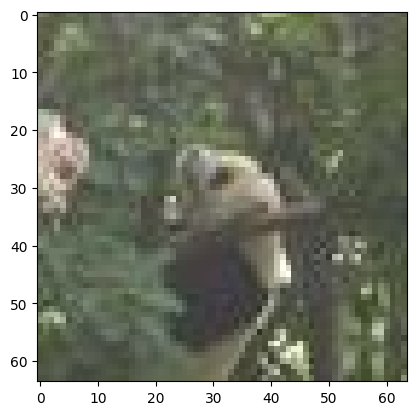

actual label:  1
predicted label:  2


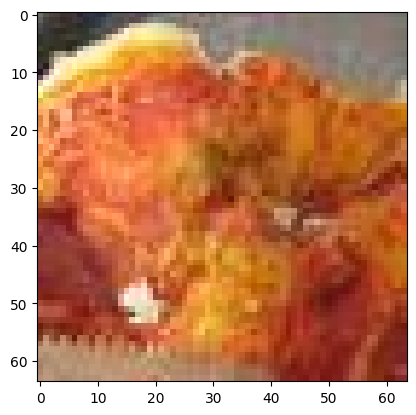

actual label:  3
predicted label:  0


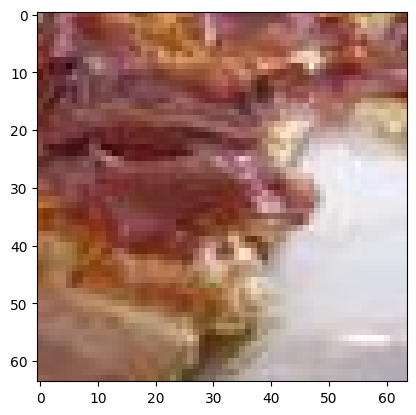

actual label:  3
predicted label:  0


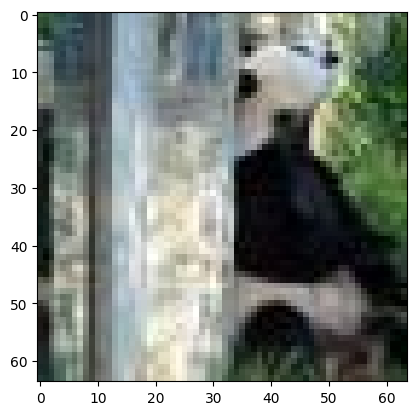

actual label:  1
predicted label:  2


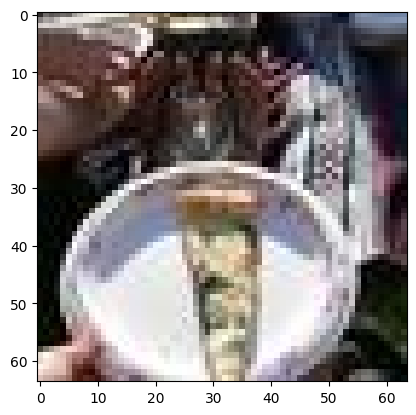

actual label:  3
predicted label:  2


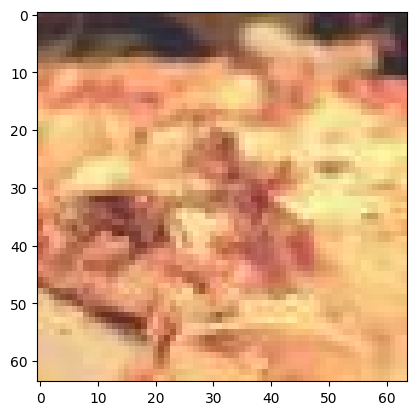

actual label:  3
predicted label:  0


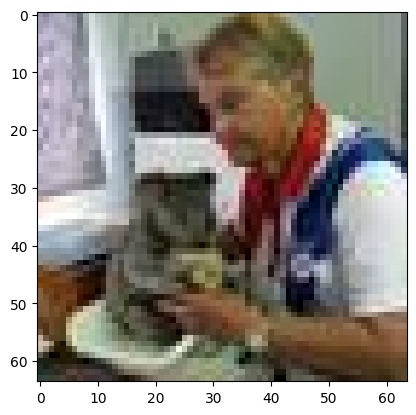

actual label:  2
predicted label:  0


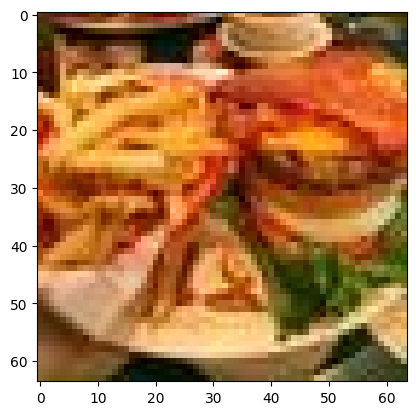

actual label:  0
predicted label:  3


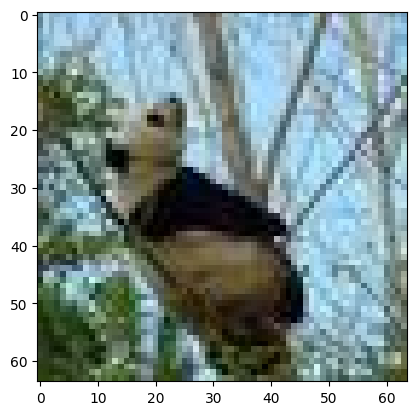

actual label:  1
predicted label:  2


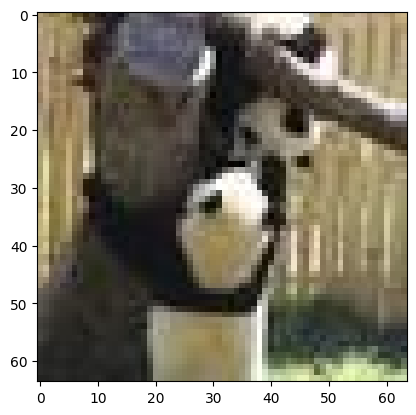

actual label:  1
predicted label:  2


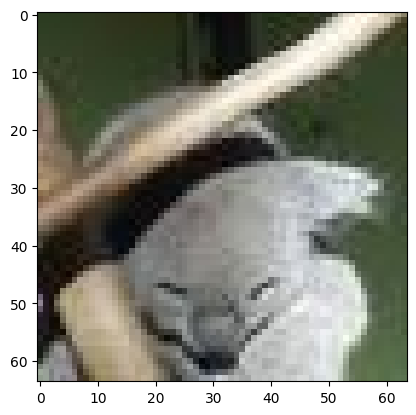

actual label:  2
predicted label:  1


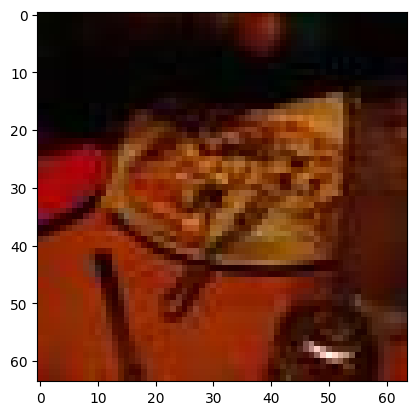

actual label:  3
predicted label:  0


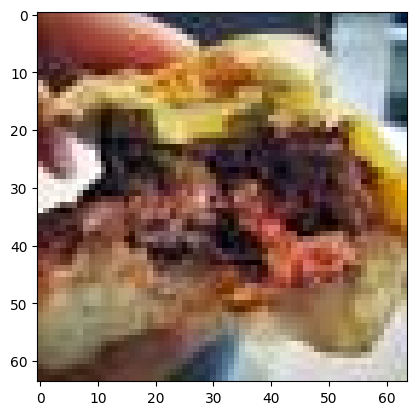

actual label:  0
predicted label:  3


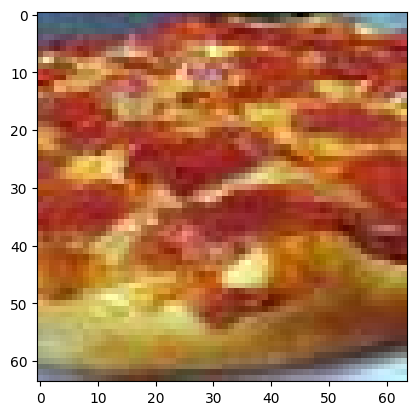

actual label:  3
predicted label:  0


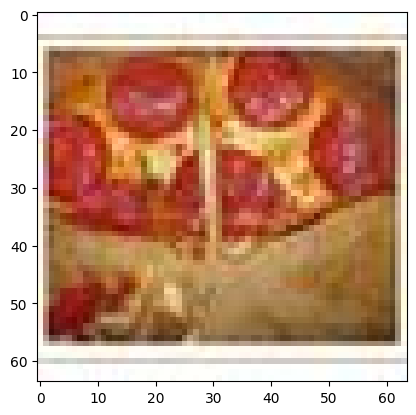

actual label:  3
predicted label:  0


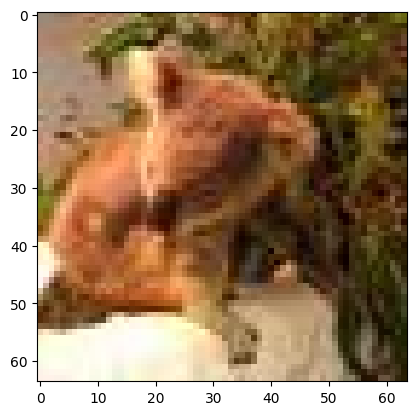

actual label:  2
predicted label:  3


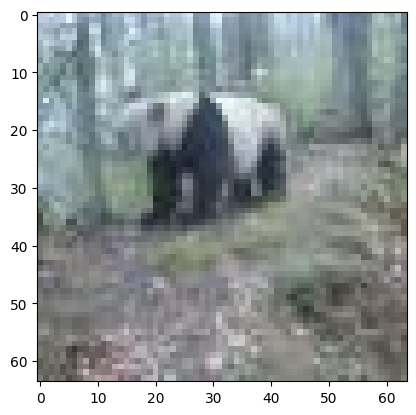

actual label:  1
predicted label:  2


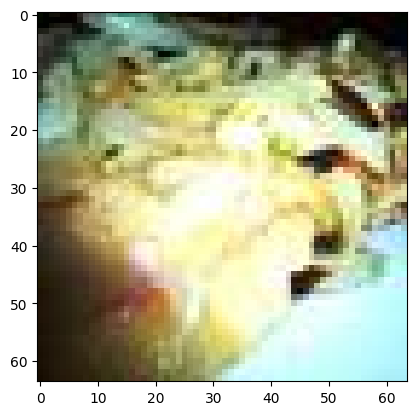

actual label:  3
predicted label:  0


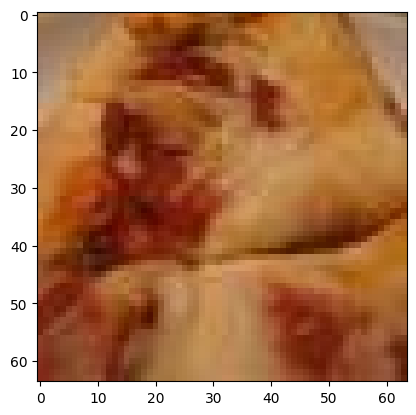

actual label:  3
predicted label:  0


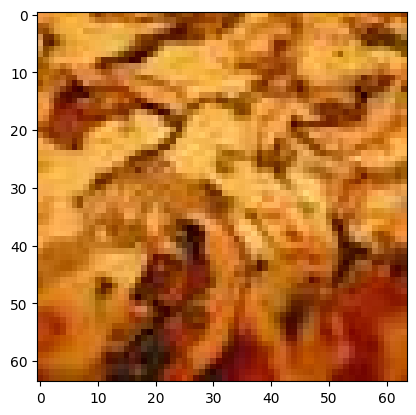

actual label:  3
predicted label:  0


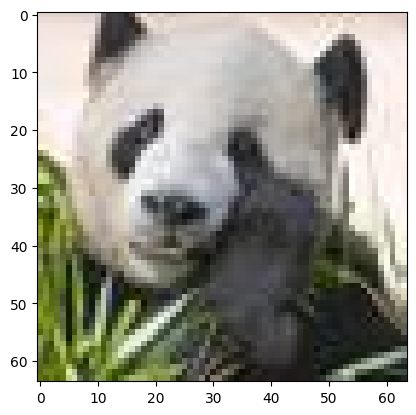

actual label:  1
predicted label:  2


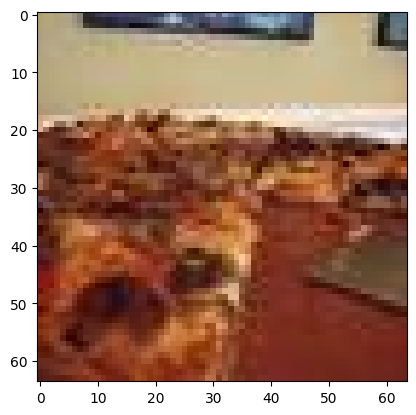

actual label:  3
predicted label:  0


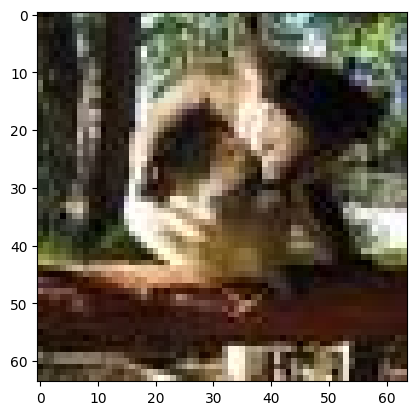

actual label:  2
predicted label:  1


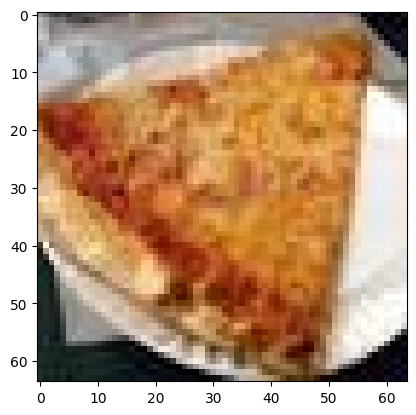

actual label:  3
predicted label:  0


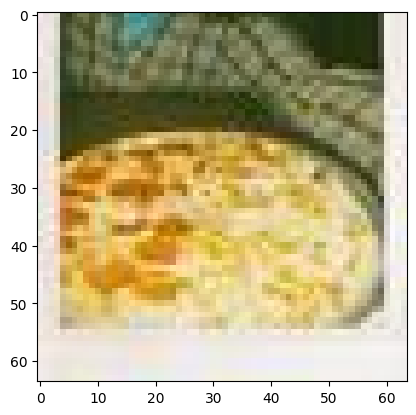

actual label:  3
predicted label:  0


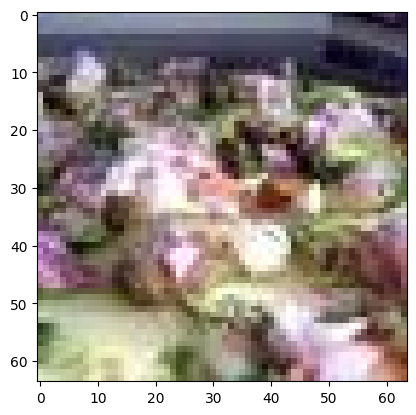

actual label:  3
predicted label:  0


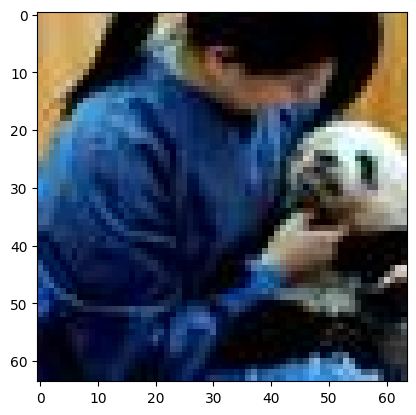

actual label:  1
predicted label:  0


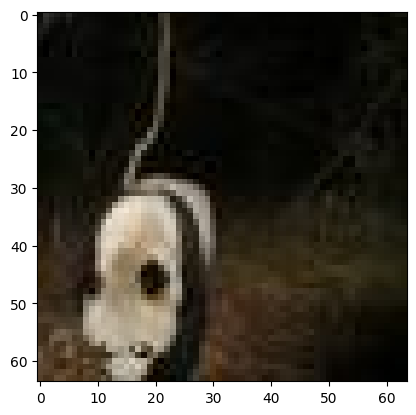

actual label:  1
predicted label:  2


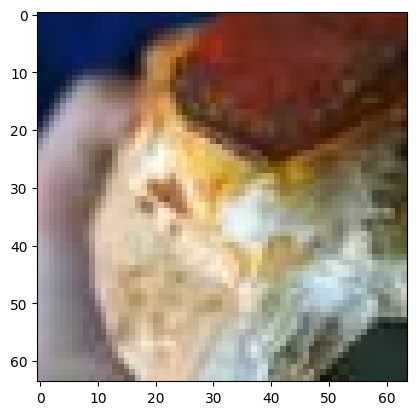

actual label:  3
predicted label:  2


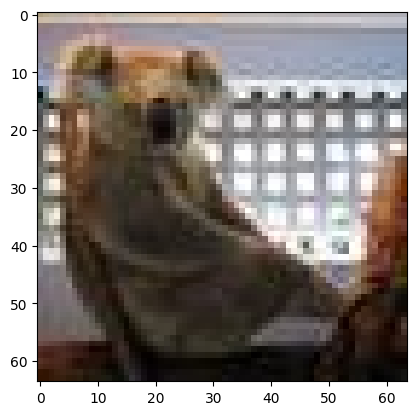

actual label:  2
predicted label:  3


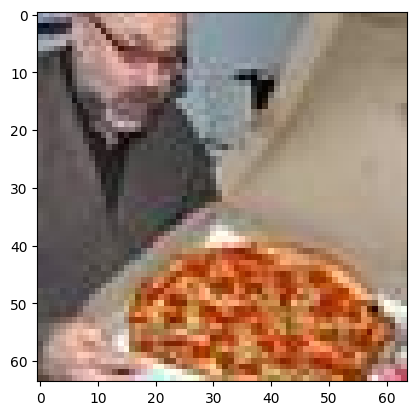

actual label:  3
predicted label:  2


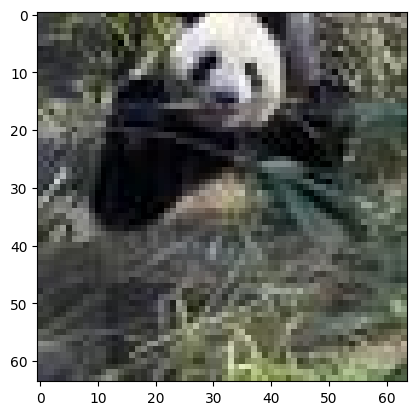

actual label:  1
predicted label:  2


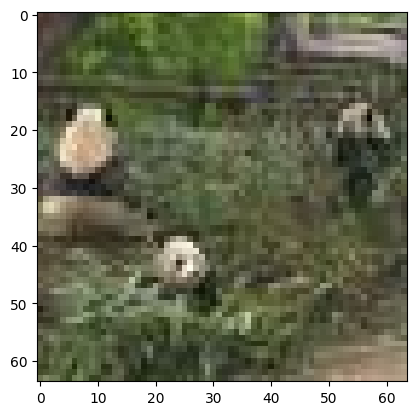

actual label:  1
predicted label:  2


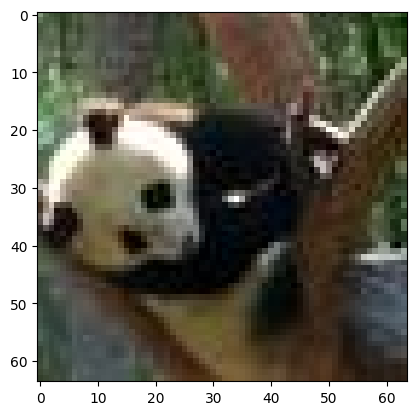

actual label:  1
predicted label:  2


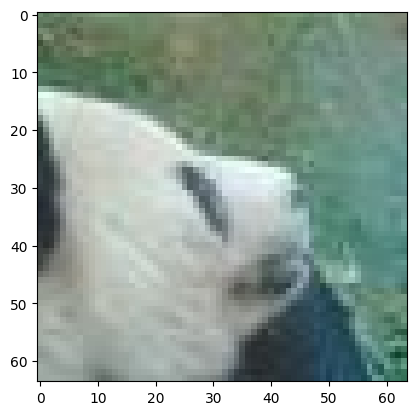

actual label:  1
predicted label:  2


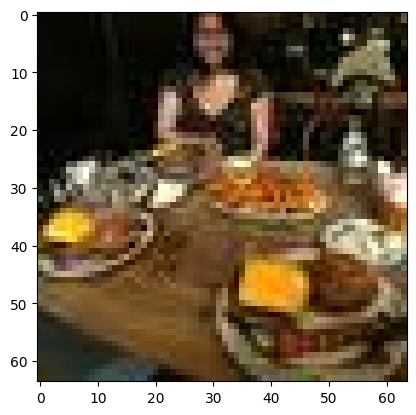

actual label:  0
predicted label:  3


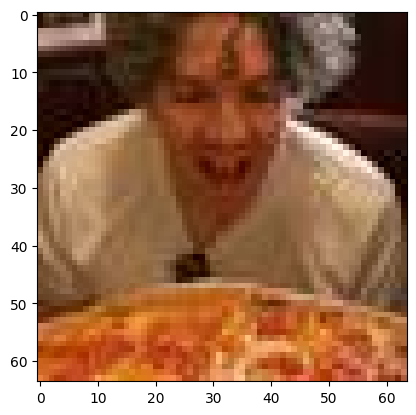

actual label:  3
predicted label:  0


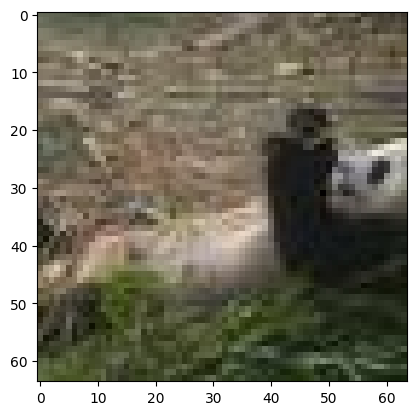

actual label:  1
predicted label:  2


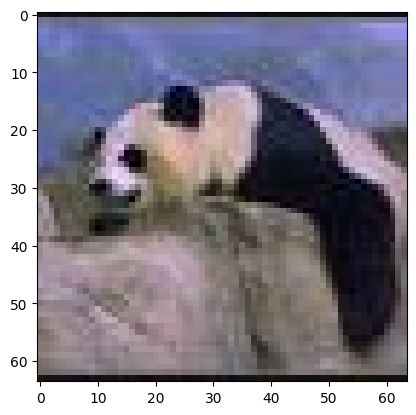

actual label:  1
predicted label:  3


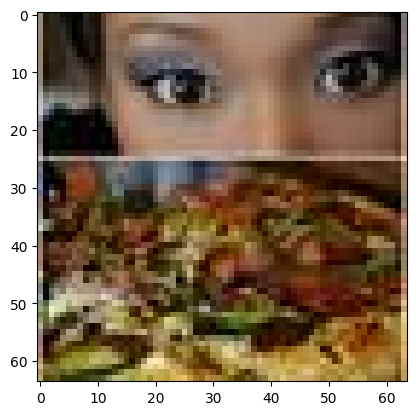

actual label:  3
predicted label:  0


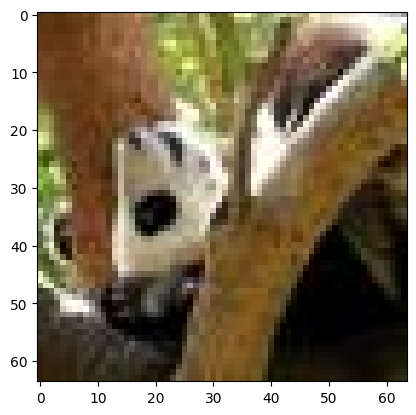

actual label:  1
predicted label:  2


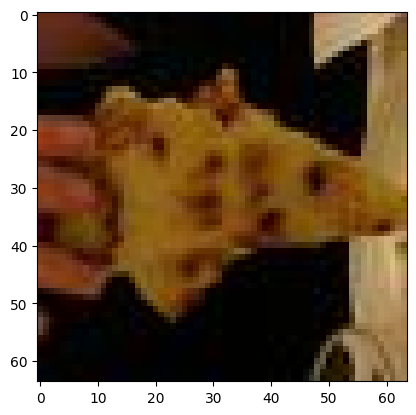

actual label:  3
predicted label:  0


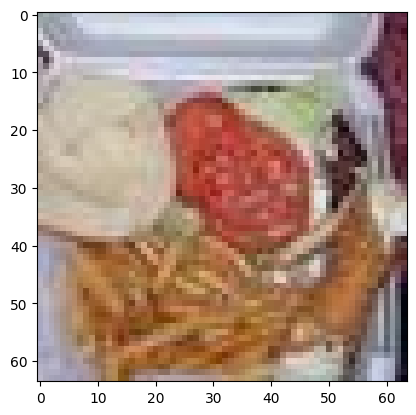

actual label:  0
predicted label:  3


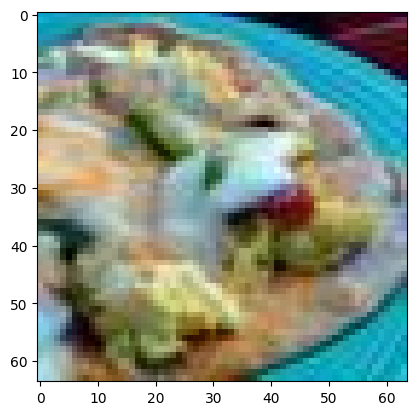

actual label:  3
predicted label:  0


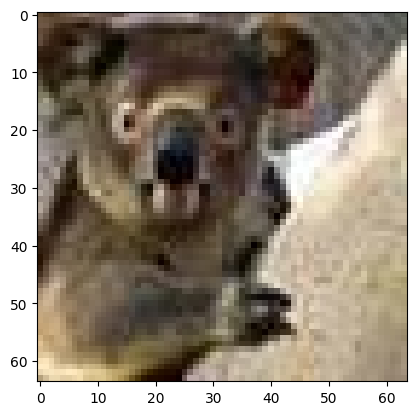

actual label:  2
predicted label:  1


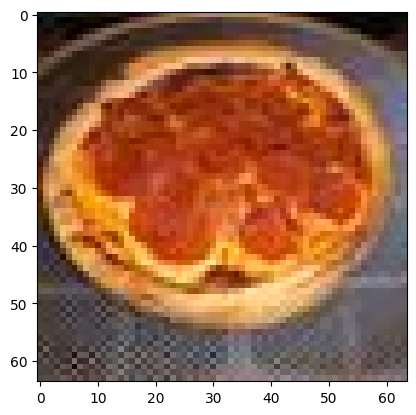

actual label:  3
predicted label:  0


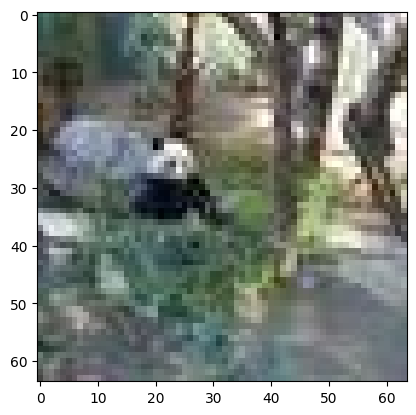

actual label:  1
predicted label:  2


In [12]:
# read wrong_items.json, it have format image_path: [expected label, predicted label], show all image with predicted label is not equal to expected label

import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

with open("wrong_items.json", "r") as f:
    wrong_items = json.load(f)

# number of most wrong
num_wrong = 0
expected_wrong = [0, 0 ,0, 0] # 4 class, maintain count
choosen_wrong = [0, 0 ,0, 0] # 4 class, maintain count
for image_path, labels in wrong_items.items():
    if labels[0] != labels[1]:
        num_wrong += 1
        expected_wrong[int(labels[0])] += 1
        choosen_wrong[int(labels[1])] += 1

print("number of wrong items: ", num_wrong)
print("expected wrong: ", expected_wrong)
print("choosen wrong: ", choosen_wrong)

for image_path, labels in wrong_items.items():
    if labels[0] != labels[1]:
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.show()
        print("actual label: ", labels[0])
        print("predicted label: ", labels[1])


In [9]:
import torch

model = torch.load('models_2_160_100/conditional_pixelcnn.pth')
print(model)

OrderedDict([('class_embedding.weight', tensor([[-0.1813,  0.6405,  1.3440,  0.6666,  0.5877, -0.4057, -0.6678,  0.5077,
         -0.1885,  1.3182, -0.0922,  0.5387, -0.6132,  0.5330, -0.0944, -0.8099],
        [ 0.7316,  0.9432,  0.4439, -0.7876, -0.3352, -0.6418, -0.6686, -0.5738,
          1.1134,  0.3980,  1.7179,  1.1084, -2.2057,  1.3966,  0.1066,  0.0064],
        [-0.0818, -1.1903,  0.6732,  0.7426, -1.1369, -0.7275,  0.3274,  1.4085,
         -1.5893, -0.5275,  0.1050, -0.6913,  1.0286,  0.6156,  1.9992, -0.2202],
        [-0.7061,  1.1098,  0.1247,  0.1664, -0.1399,  0.4095,  1.8634,  1.2146,
          1.0757,  0.0488, -2.1849, -0.0034,  0.3367, -3.1521,  0.6767,  0.9035]],
       device='cuda:0')), ('onehot_linear.weight', tensor([[ 9.1011e-02,  1.7685e-01, -4.2472e-01, -4.5824e-01],
        [-6.2661e-02, -4.5798e-01,  1.6340e-01,  1.9220e-01],
        [-3.8962e-01, -1.9944e-01, -1.1622e-01,  2.3573e-01],
        [-2.3138e-01, -4.5260e-01, -2.1308e-02, -1.5573e-02],
        